In [20]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import IPython.display as ipd

## Ruído Branco

In [33]:
ruido_branco = np.random.uniform(low = -1, 
                                 high = 1,
                                 size = 16000)

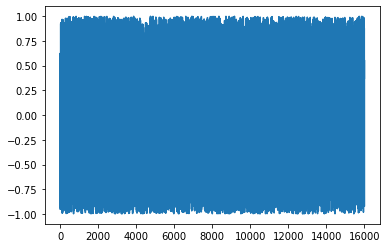

In [34]:
plt.plot(ruido_branco)

In [35]:
ruido_branco.mean()

-0.0035866344746421255

In [36]:
ipd.Audio(ruido_branco, rate = 8000)

In [38]:
def get_signal_energy(signal: list) -> float:
    """Gets the energy of a signal"""
    
    x = abs(signal)
    energy = sum(x ** 2)
    return energy

In [39]:
get_signal_energy(ruido_branco)

5282.605426006661

In [84]:
seno_y = np.array([np.sin(i) for i in np.linspace(0, 2 * np.pi, 16000)])
seno_x = np.linspace(0, 2 * np.pi, 16000)

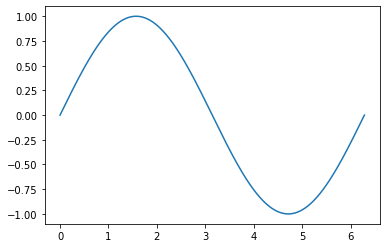

In [85]:
plt.plot(seno_x, seno_y)

In [45]:
seno_quadrado = seno ** 2

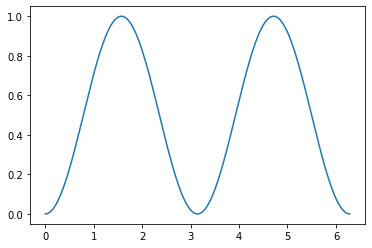

In [56]:
plt.plot(seno_x, seno_quadrado)

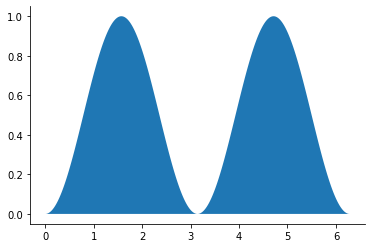

In [57]:
plt.fill(seno_x, seno_quadrado)
sns.despine()

In [58]:
get_signal_energy(seno_y)

7999.499999999991

In [63]:
rms_seno = np.sqrt((seno_y ** 2).mean())
print(rms_seno)

0.7070846837543577


In [64]:
rms_ruido = np.sqrt((ruido_branco ** 2).mean())
print(rms_ruido)

0.5745979804397296


In [67]:
snr = (rms_seno / rms_ruido) ** 2

In [68]:
snr_db = 10 * np.log10(snr)

In [69]:
snr_db

1.8021466962640633

In [70]:
def signal_rms(signal: list) -> float:
    """Calculate signal rms"""
    
    temp = (signal ** 2).mean()
    rms = np.sqrt(temp)
    return rms
    

In [77]:
def snr_db(signal: list ,noise: list) -> float:
    """Calculate the SNR """
    
    x_rms = signal_rms(signal)
    noise_rms = signal_rms(noise)
    
    snr = (x_rms / noise_rms) ** 2
    snr_db = 10 * np.log10(snr)
    return snr_db

In [138]:
snr_db(seno_y, ruido_branco)

33.84334652282331

In [121]:
# Audio do seno
ipd.Audio(seno_y, rate = 8000)

In [146]:
f = 330
seno_y = np.array([np.sin(i * f) for i in np.linspace(0, 2 * np.pi, 16000)]) * 40
seno_x = np.linspace(0, 2 * np.pi, 16000)

seno_contaminado = seno_y + ruido_branco

snr_seno_contaminado = snr_db(seno_y, ruido_branco)

print(f'SNR em dB: {snr_seno_contaminado:.2f}')

# Audio do seno
ipd.Audio(seno_contaminado, rate = 8000)

SNR em dB: 33.84


In [139]:
def fix_snr(signal: list, in_snr: float, out_snr: float) -> list:
    """Modify SNR by multiplying by a gain"""

    if out_snr == np.inf:
        gain = 0
    else:
        gain = 10 ** (0.05 * (in_snr - out_snr))
    
    return gain * a

In [158]:
snr_modificada = 0
ruido_modificado = fix_snr(ruido_branco,
                           snr_seno_contaminado,
                           snr_modificada)

seno_contaminado = seno_y + ruido_modificado
snr_seno_contaminado_modificado = snr_db(seno_y, ruido_modificado)

print(f'SNR original em dB: {snr_seno_contaminado:.2f}')
print(f'SNR original em dB: {snr_seno_contaminado_modificado:.2f}')

# Audio do seno
ipd.Audio(seno_contaminado, rate = 8000)

SNR original em dB: 33.84
SNR original em dB: -0.00
